
# **<center><font style="color:rgb(100,109,254)">Human Action Recognition in Videos</font> </center>**

<center>
<img src='https://drive.google.com/uc?export=download&id=1ucdFpzyVbzTa7kPYsJ2av-gRKgd84ICA'></center>

# For a much more detailed explanation of the project, please read the `Report file`

## **<font style="color:rgb(134,19,348)"> Outline </font>**

- **`Step 1:` [Overview](#overview)**
    - **[ResNet3D](#resnet3d)**
    - **[R2Plus1D](#r2plus1d)**
    - **[Convolutional LSTM](convlstm)**
    - **[R3D](#r3d)**
    - **[Dataset](#dataset)**

- **`Step 2:` [Installation and Importation of Libraries](#import)**

- **`Step 3:` [Versions of Libraries used in this Project](#versionsused)**

- **`Step 4:` [Device setup](#devidesetup)**

- **`Step 5:` [Allways Inspect your Data](#inspectdata)**

- **`Step 6:` [Data Preprocessing](#preprocess)**
 
    - **`Step 5.1:` [Split Data into Train, Validation, and Test](#split)**
    
    - **`Step 5.2:` [Data Augmentation](#aug)**
    
    - **`Step 5.3:` [Frame Extraction](#framesextraction)**
    
    - **`Step 5.4:` [Efficient Data Loading Pipeline](#load)**
    
- **`Step 7:` [Model Architectures](#models)**

     - **`Step 7.1:` [R2Plus1D (ResNet(2+1)D)](#mr2plus1d)**
    
    - **`Step 7.2:` [ResNet3D](#mresnet3d)**
    
    - **`Step 7.3:` [Pre-trained R3D](#mr3d)**
    
    - **`Step 7.4:` [Convolutional LSTMS (ConvLSTM)](#mconvlstm)**

- **`Step 8:` [Instantiate Model for Training and Inference](#instantiatemodel)**

- **`Step 9:` [(Weighted) Solution for Imbalance Dataset](#weights)**

- **`Step 10:` Helper Functions**

     - **`Step 10.1:` [Deleting Files](#helperfuncdel)**
    
    - **`Step 10.2:` [Save Metrics for later Evaluation](#helperfuncsavemetrics)**
    
    - **`Step 10.3:` [Load previously saved Models for either Training or Inference](#helperfuncloadmodel)**
    
- **`Step 11:` [Hyper parameters, Dataloaders, Loss function, Optimizer, LR sceduler](#hyper-param)**

- **`Step 12:` [Training and Evaluation Loops](#train)**

- **`Step 13:` [Plot Perfomance Metrics](#plot)**

- **`Step 14:` [Testing Models on the unseen, test Dataset](#test)**

- **`Step 15:` [Confusion Matrix, Accuracy Score, and Classification Matrix using sk-learn](#confusionmatrix)**

- **`Step 16:` [Download YouToube Videos for Live-feed Testing](#dwonloadyt)**

- **`Step 17:` [Test the Downloaded Video, write the Predicted Classes on it (Clip-level), and Save it for later use](#inference)**

- **`Step 18:` [Visualize the Saved Video](#visualize)**



# <a name="overview"></a> **<font style="color:rgb(134,19,348)">Overview:</font>**
**`Video action recognition`** is a vital task in computer vision, which involves the classification of human actions in videos. This task has numerous applications in fields such as **surveillance**, **robotics**, and **human-computer interaction**. In recent years, deep learning-based approaches have achieved remarkable success in this field. Deep learning models have been able to learn discriminative features automatically from the raw video frames, which has led to significant improvements in video action recognition performance.

In this project, I aim to implement from scratch and demonstrate the effectiveness of three popular models for this task, namely: **`ResNet3D`**, **`R2Plus1D`**, and **`ConvLSTM`**.


### <a name="resnet3d"></a> **<font style="color:rgb(134,19,348)">1. ResNet3D</font>**
**`ResNet3D`** is an extension of the ResNet architecture that incorporates the use of 3D convolutional layers to capture **spatio-temporal** features from video frames. By considering both spatial and temporal information simultaneously, ResNet3D is able to extract more informative features from video data, which is essential for accurate action recognition. 

The ResNet architecture consists of multiple residual blocks, which are designed to address the issue of vanishing gradients that often arise in very deep networks. Each residual block contains two 3D convolutional layers, followed by batch normalization and ReLU activation. The output of these layers is then combined with the input to the residual block through a skip connection. This enables the network to learn more complex features by allowing it to bypass certain layers in the network. 

In contrast to traditional 2D convolutional layers, 3D convolutional layers are able to capture both spatial and temporal information simultaneously by considering multiple frames of a video at a time. This allows ResNet3D to capture motion information, which is a crucial aspect of video action recognition.

Overall, ResNet3D's ability to capture both spatial and temporal information simultaneously, coupled with its use of residual blocks and skip connections, make it an effective tool for modeling complex patterns in video data.


### <a name="r2plus1d"></a> **<font style="color:rgb(134,19,348)">2. R2Plus1D = ResNet(2+1)D </font>** 
**`ResNet(2+1)D`** is an innovative extension of the ResNet architecture that leverages both 2D and 1D convolutions to capture **spatio-temporal** features from video frames. This variant is an improvement over the traditional ResNet architecture. It has 1D convolutions that can capture temporal information and 2D convolutions that can capture spatial information from video frames, making it more suitable for video action recognition tasks.

The (2+1)D convolutional block in ResNet(2+1)D factorizes the 3D convolution into two separate and successive operations - a 2D spatial convolution and a 1D temporal convolution. This approach is advantageous because it allows for additional non-linear rectification between the two operations. By doing so, it effectively doubles the number of nonlinearities compared to a network using full 3D convolutions for the same number of parameters. As a result, the ResNet(2+1)D model can represent more complex functions and is capable of capturing spatiotemporal features more efficiently.

Furthermore, the factorization of the 3D convolution facilitates optimization, which yields lower training and testing losses. This is because the factorization reduces the number of parameters in the model and simplifies the optimization process. Consequently, the ResNet(2+1)D model trains faster and with less computational resources, making it more practical for large-scale video recognition tasks.

Overall, ResNet(2+1)D is a significant advancement in the field of video action recognition, providing a more effective way to extract spatiotemporal features from video frames. Its innovative design, combining both 2D and 1D convolutions, allows for more efficient and accurate video analysis, opening new possibilities for applications such as surveillance, robotics, and autonomous driving.

### <a name="convlstm"></a> **<font style="color:rgb(134,19,348)">3. ConvLSTM</font>**
**`ConvLSTM`** is a type of recurrent neural network that has been applied to video analysis tasks, such as video prediction and action recognition. Unlike traditional LSTMs, ConvLSTMs operate on 2D spatial and 1D temporal sequences by incorporating **convolutional layers** in the LSTM cells.

The ConvLSTM architecture has a similar structure to the LSTM, but each cell contains convolutional layers in addition to the gating units. **These convolutional layers allow ConvLSTMs to learn spatial and temporal features simultaneously**, making them well-suited for video analysis tasks. The input to a ConvLSTM cell is a 3D tensor, consisting of the **current input frame** and the **hidden state** and **cell state** from the **previous time step**.

The convolutional layers in ConvLSTM cells allow the network to learn spatial and temporal features jointly, which is especially useful for tasks like video action recognition, where both the spatial and temporal aspects of the video are important. 

By incorporating convolutional layers, ConvLSTMs can capture both short-term and long-term dependencies between frames, making them more effective for tasks where temporal context is critical.

**Note: The `ConvLSTMS's memory footprint` is much higher than the other models'. So, I used a smaller resolution, the number of frames per video, and layers compared to other models' Even a ConvLSTM of just more than four layers always raises a `MemoryOutOfBounds` error, whereas I could use even above 101 layers for the other models**.


### <a name="r3d"></a> **<font style="color:rgb(134,19,348)">4. R3D_18 ????</font>**
R3D_18 is a pre-trained model (imported from torchvision), which I fine-tuned to see how it would compare to the models that were not pre-trained on any data apriori. 


# <a name="dataset"></a> **<font style="color:rgb(134,19,348)">Dataset </font>**

In this project, I trained and evaluated `R3D`, `ResNet3D`, `R2Plus1D`, and `ConvLSTM` models for action recognition on the **`UCF101`** dataset. The dataset can be added by just clicking on **Add Data** and then **type Ucf101** in the search field. The UCF101 dataset consists of **`13,320 videos of human actions`** of over **`27 hours of video data`**, which are divided into **`101 action categories`**. The videos have different lengths and resolutions. So, I resize them and do common data augmentation techniques such as random cropping, rotatation, flipping, etc.

To train the models, I split the dataset into 8:2 ratio for train and test, and then further split the train dataset in the ratio 8:2 for train and validation. So, the training set consists of $0.8  \times 0.8\times 13,320 \approx 8,525$ videos, the validation set is $0.8  \times 0.2 \times 13,320 \approx 2,131$ - used to tune the hyperparameters of the models and prevent overfitting, and finally the test set is $0.2 \times 13,320 \approx 2,664$ videos - used to evaluated the performance of the models.

Training and evaluating the models on the UCF101 dataset allowed me to assess their performance on a diverse set of human actions in various scenarios. The dataset's split into training, validation, and test sets ensured that the models were not overfitting to the training set and could generalize well to new data. 

### **<font style="color:rgb(134,19,348)">But why not a smaller dataset like ucf50 for faster training, or a larger one with many action categories for a more robust model? </font>**
The **`UCF101`** dataset is used because it is considered to be an appropriate dataset size to train a **very deep model from scratch** while still being able to generalize well to unseen data. The decision not to use a smaller dataset like **`UCF50`** was based on the fact that human action recognition involves many actions beyond just 50, and a smaller dataset may not provide enough variety to train a robust model. On the other hand, larger datasets like **`Sports-1M`** require a considerable amount of compute resources, which is not available to me. In this case, I used the **Kaggle GPU**s to train the models but had limited **GPU time**, which led to the need for a dataset of modest size that is sufficcient enough to train a robust model. 

Training deep learning models on large datasets with many categories requires a lot of computational resources and time. However, it is necessary to achieve high accuracy and generalization in tasks such as human action recognition. Using a smaller dataset may not provide enough variety to capture the nuances of different human actions, while using a larger dataset may require an unreasonable amount of time and compute. Therefore, using a dataset that strikes a balance between size and computational requirements is essential for achieving a robust and generalizable deep learning model for human action recognition.

Now, imagine using just 20 frames per video of size (h=112, w=112, c=3) for 13,320 videos. That is above three billion and thus huge for the limited compute at my disposal. So, using a larger dataset for this task is out of reach for me.

Overall, training and evaluating the models on the UCF101 dataset provided insights into their effectiveness for action recognition in real-world scenarios.

# <a name="import"></a> **<font style="color:rgb(134,19,255)"> Installation & Importation Libraries</font>**


### **<font style="color:rgb(131,19,255)"> Intall and load `Watermark` for displaying versions of imports </font>**

In [54]:
%%capture
!pip install watermark

#load
%load_ext watermark 

#To view all available commands
%watermark?

Docstring:
::

  %watermark [-a AUTHOR] [-gu GITHUB_USERNAME] [-e EMAIL] [-ws WEBSITE]
                 [-d] [-n] [-t] [-i] [-z] [-u] [-c CUSTOM_TIME] [-v]
                 [-p PACKAGES] [-co] [-h] [-m] [-g] [-r] [-b] [-w] [-iv]

IPython magic function to print date/time stamps
and various system information.

optional arguments:
  -a AUTHOR, --author AUTHOR
                        prints author name
  -gu GITHUB_USERNAME, --github_username GITHUB_USERNAME
                        prints author github username
  -e EMAIL, --email EMAIL
                        prints author email
  -ws WEBSITE, --website WEBSITE
                        prints author or project website
  -d, --date            prints current date as YYYY-mm-dd
  -n, --datename        prints date with abbrv. day and month names
  -t, --time            prints current time as HH-MM-SS
  -i, --iso8601         prints the combined date and time including the time
                        zone in the ISO 8601 standard with UTC off

### **<font style="color:rgb(131,19,255)"> Import the required libraries. </font>**

In [55]:

import os
import cv2
import math
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F

from tqdm import tqdm # just a progressive bar

#from PIL import Image, ImageDraw, ImageFont

### <a name="versionsused"></a> **<font style="color:rgb(131,19,255)"> These are the versions used in this notebook</font>**


In [56]:
%watermark -a "Yusupha Juwara" -i -u -v -w -iv -p tqdm
%watermark -p sklearn

Author: Yusupha Juwara

Last updated: 2023-05-12T16:43:32.653917+00:00

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 7.34.0

tqdm: 4.63.0

seaborn    : 0.12.2
numpy      : 1.21.6
torch      : 1.13.0
matplotlib : 3.5.3
dill       : 0.3.6
torchvision: 0.14.0
cv2        : 4.5.4

Watermark: 2.3.1

sklearn: 1.0.2



In [57]:

#dataset_dir = "/kaggle/input/ucf50-action-recognition-dataset/UCF50"
dataset_dir = "/kaggle/input/ucf101/UCF-101"

working_dir = "/kaggle/working/"


seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
torch.manual_seed(seed_constant)


### <a name="devidesetup"></a> **<font style="color:rgb(131,19,348)"> Set the device and get cpu and gpu counts</font>**


In [58]:
# Check if CUDA is available
print(torch.cuda.is_available())
print(f"num of gpus: {torch.cuda.device_count()}, \t num of cpus: {os.cpu_count()}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
device

True
num of gpus: 1, 	 num of cpus: 2


device(type='cuda')

## <a name="inspectdata"></a> **<font style="color:rgb(131,19,348)">  Always inspect your data - Visualize few samples from the dataset</font>**


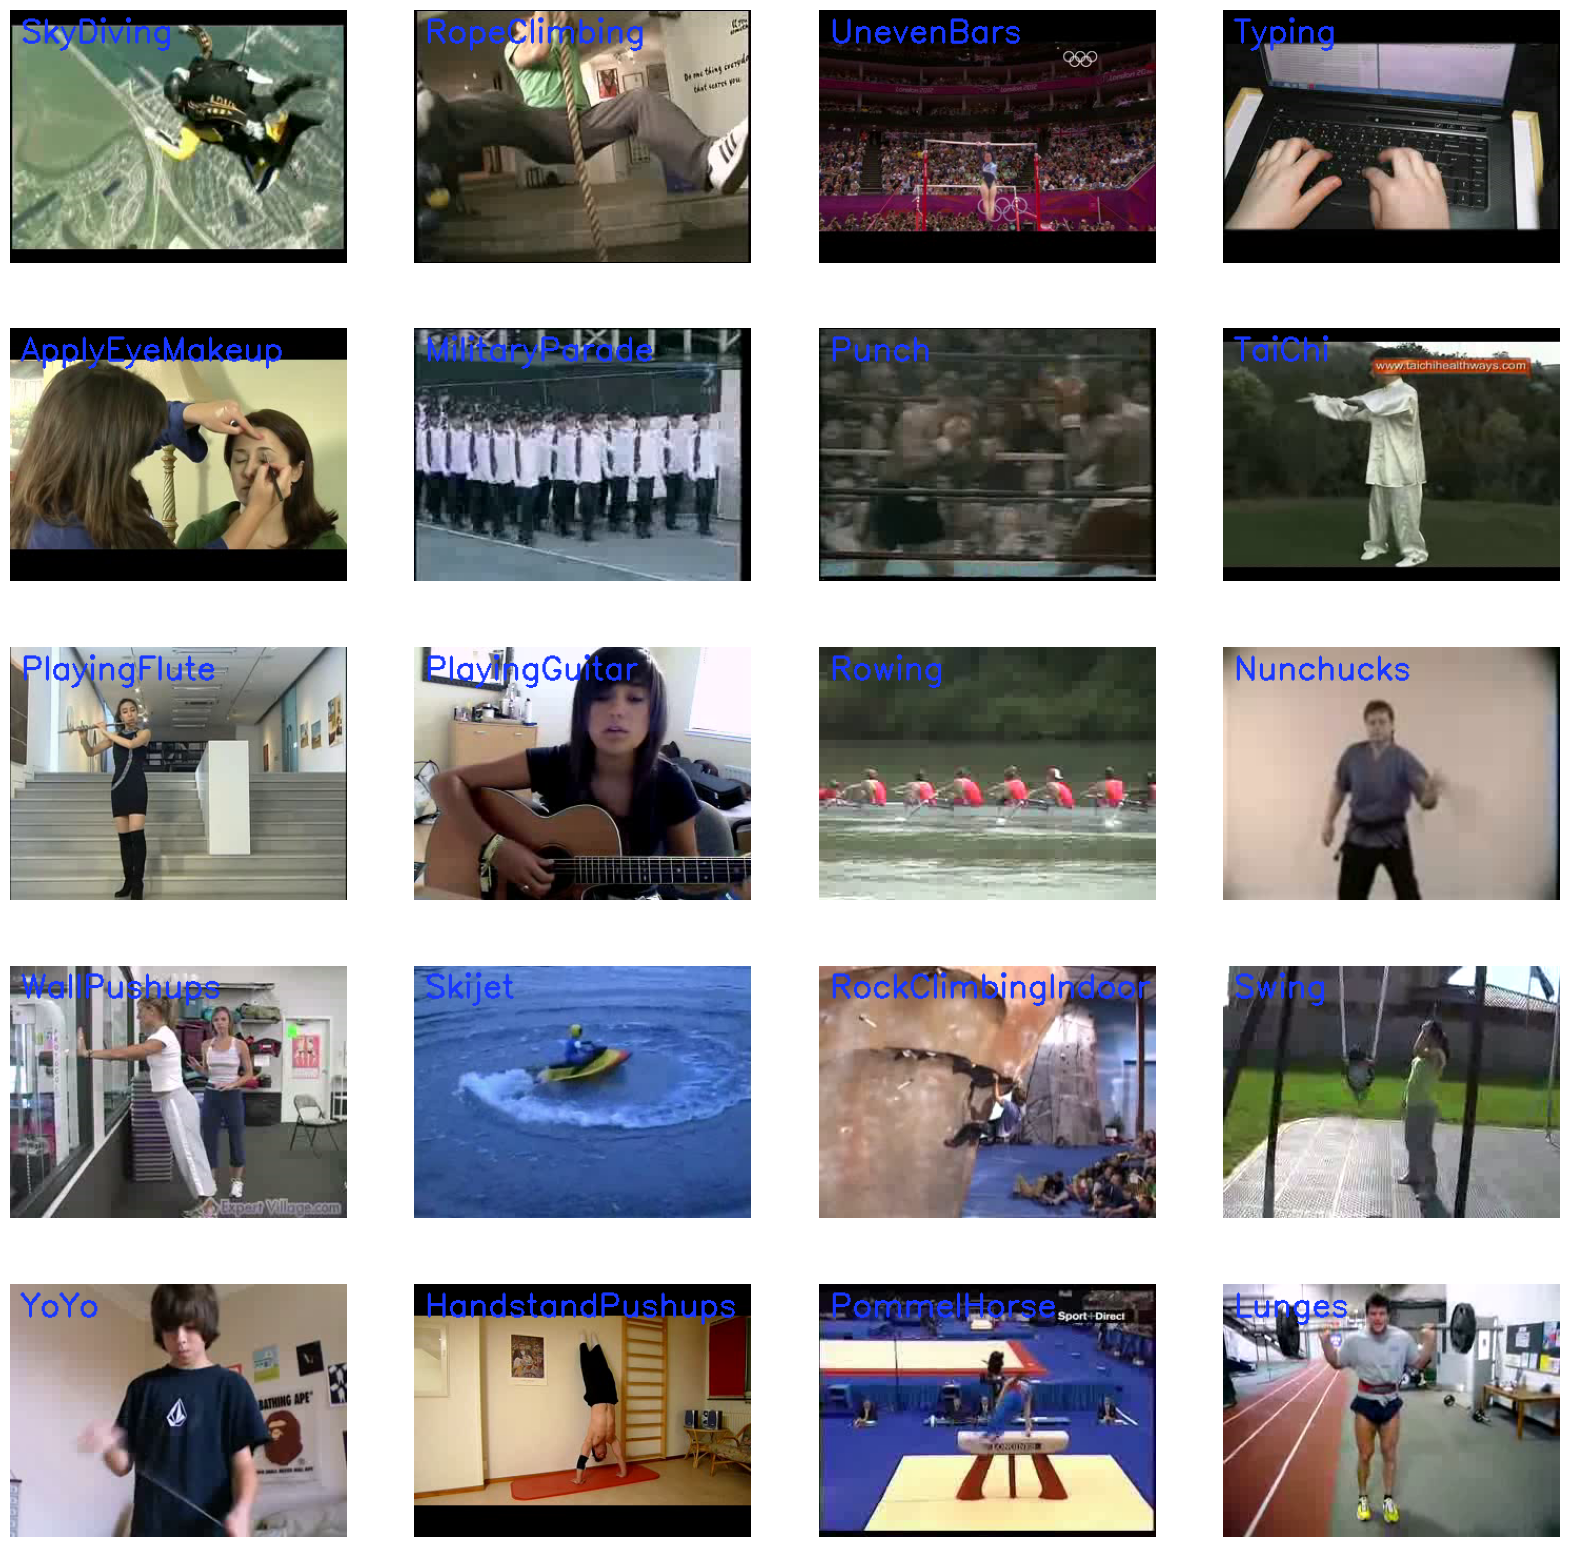

In [59]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir(dataset_dir)

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'{dataset_dir}/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'{dataset_dir}/{selected_class_Name}/{selected_video_file_name}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (25, 55, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);
    plt.imshow(rgb_frame);plt.axis('off')

# <a name="preprocess"></a> **<font style="color:rgb(134,19,348)">Step 2: Preprocess the Dataset</font>**


In [60]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 112, 112

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20


### Get the paths and labels of each video file

In [61]:

def prepare_data():
    # List all the class folders within the root directory
    class_labels = os.listdir(dataset_dir) 
    class_folders = list( map( lambda x: os.path.join(dataset_dir, x), class_labels) )

    videos_paths     = []
    class_labels_idx = []
    for idx, class_folder in enumerate( tqdm( class_folders) ):

        # List all the video file names in the class folder
        files = os.listdir(class_folder)

        # Join the video file names with the class folder
        video_paths =  list( map( lambda x: os.path.join(class_folder, x), files) )

        videos_paths.extend(video_paths)
        class_labels_idx.extend([idx for _ in video_paths])

    return videos_paths, class_labels, class_labels_idx

videos_paths, class_labels, class_labels_idx = prepare_data()

100%|██████████| 101/101 [00:00<00:00, 926.52it/s]


### <a name="split"></a> **<font style="color:rgb(134,19,348)"> Split the dataset into train, eval, and test sets </font>**


In [62]:
# one_hot_pt = F.one_hot(torch.tensor( class_labels_idx ) )
num_classes = len( np.unique(class_labels_idx) )
print(f"Number of classes: {num_classes} \nTotal number of samples: {len(class_labels_idx)}")

# Split the data into train and test
Xtrain1, Xtest, ytrain1, ytest = train_test_split(videos_paths, class_labels_idx, test_size=0.2, shuffle=True, random_state=seed_constant, stratify=class_labels_idx )

# Split the train data into train and validation
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain1, ytrain1, test_size=0.2, shuffle=True, random_state=seed_constant, stratify=ytrain1 )
print(f"Number of samples for training: {len(Xtrain)}, \tevalution: {len(Xval)}, and testing: {len(Xtest)}")


Number of classes: 101 
Total number of samples: 13320
Number of samples for training: 8524, 	evalution: 2132, and testing: 2664


### <a name="aug"></a> **<font style="color:rgb(134,19,348)"> Data Augmentation </font>**

If a pretrained model like r3d_18 is used, then this transform is not used, but instead, the model's data pre-processing is used.

In [63]:
# Only if image is PIL...
def transformation(IMAGE_WIDTH=IMAGE_WIDTH, IMAGE_HEIGHT=IMAGE_HEIGHT):
    return (transforms.Compose([
            transforms.ToPILImage(), 
            transforms.RandomResizedCrop(size=((IMAGE_WIDTH+50, IMAGE_HEIGHT+35)), scale=(0.8, 1.0)),
            transforms.RandomRotation(degrees=15), # rotates within range (-15 to 15).
            #transforms.RandomHorizontalFlip(), # randomly flips horizontally with a default probability of 50%
            transforms.CenterCrop(size=((IMAGE_WIDTH, IMAGE_HEIGHT))),
            transforms.ToTensor(), # PIL to tensor, then normalizes in the range (0-1) by dividing by 255
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),

        transforms.Compose([
            transforms.ToPILImage(), 
            transforms.Resize(size=(IMAGE_WIDTH, IMAGE_HEIGHT)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
           )
        
#train_transform, test_transform = transformation(IMAGE_WIDTH=IMAGE_WIDTH, IMAGE_HEIGHT=IMAGE_HEIGHT)

#t = torch.randn((3,6,6))
#train_transform(t), test_transform(t)

### <a name="framesextraction"></a> **<font style="color:rgb(134,19,348)"> Frames Extraction. </font>**

This is a Python function that takes a video file path and a data augmentation transform as input arguments, and extracts a fixed number of frames (SEQUENCE_LENGTH) from the video file. The extracted frames are then preprocessed using the given transform and returned as a PyTorch tensor.

The function first initializes a VideoCapture object from OpenCV, which reads the video file at the specified path. The total number of frames in the video is then obtained using the `get` method of the VideoCapture object.

The function then uses a step value to determine which frames to extract from the video file. The step value is calculated as the maximum of 1 and the total number of frames divided by the desired sequence length (SEQUENCE_LENGTH). The function then extracts frames at SEQUENCE_LENGTH equally spaced intervals, starting from the first frame.

For each extracted frame, the function applies the given data augmentation transform if `use_transform` is `True`, or applies a default transform if `use_transform` is `False`. The transformed frame is then appended to a list of frames.

If the number of extracted frames is less than SEQUENCE_LENGTH, the function adds more frames to the list by duplicating the last extracted frame until the desired sequence length is reached.

Finally, the list of frames is converted to a PyTorch tensor using the `stack` method, and returned as the output of the function.

In [64]:


def frames_extraction( video_path, transform, use_transform=True ):
    '''    
    Args:
        video_path: The path of the video on the disk, whose frames are to be extracted.
        transform: For data augmentation
        use_transform: whether or not to use the transform. 
                        If a pretrained model like r3d_18 is used, then this transform is not used, 
                        but instead, the model's data pre-processing is used
    Returns:
        frames: Frames of the video of len SEQUENCE_LENGTH.
    '''
    
    # Read the Video File using the VideoCapture object.
    video = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    """if total_frames <= SEQUENCE_LENGTH:
        print(f"Number of frames = {total_frames} is less than sequence length = {SEQUENCE_LENGTH} for {video_path}")
        frame_indices = range(total_frames) # Take all frames...
        # return None

    else:
        # Generate SEQUENCE_LENGTH distinct random integers between 0 and total_frames-1
        step = int(total_frames/SEQUENCE_LENGTH)
        #step = 
        frame_indices = sorted( random.sample(range(1, total_frames, step), SEQUENCE_LENGTH) )"""
        
    step = max(int(total_frames/SEQUENCE_LENGTH), 1)
    #frame_indices = sorted( random.sample(range(1, total_frames, step), SEQUENCE_LENGTH) )

    # Declare a list to store video frames.
    frames = []
    try:
        # Extract the frames at the chosen indices
        for i in range(SEQUENCE_LENGTH):

            # Set the video's current frame index to the chosen index
            video.set(cv2.CAP_PROP_POS_FRAMES, i*step)

            # Read the frame at the current index
            success, frame = video.read()

            # Check if Video frame is not successfully read (corrupted or no more frames to read, etc) then break the loop
            if not success:
                # print(f"{video_path} is not successfully read; {success}, {total_frames}, {frame}")
                break
                
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Apply data augmentation here: transform...
            if use_transform:
                frame = transform(frame)
            else:
                # To use the transform specific to pretrained models
                transform = transforms.Compose([
                    transforms.ToPILImage(), 
                    transforms.Resize(size=(IMAGE_WIDTH, IMAGE_HEIGHT)),
                    #Convert a PIL Image to a tensor of the same type - this does not scale values.
                    transforms.PILToTensor()
                ])
                
                frame = transform(frame)

            frames.append(frame)
    
    finally:
        # Release the VideoCapture object. 
        video.release()

        # destroy all opened windows if any
        # cv2.destroyAllWindows()

    f = len(frames)
    if f != SEQUENCE_LENGTH:
        print(f"Length of frames able to get is : {f} for Video path: {video_path}. But the total number of frames is: {total_frames}" )
        
        while len(frames) < SEQUENCE_LENGTH:
            # Add some random "noise" if frame sequence is less than SEQUENCE_LENGTH. 
            # This could make the model hard to differentiate between samples (that are most similar), and thus robust.
            #frame = torch.randn(frames[0].shape)
            # frame = torch.zeros_like(frames[0])
            frames.append(frames[-1]) # Just add the last frame
        print(f"Now added {len(frames)-f} more frame(s). Frames len is:{len(frames)} \n")
        # return None
        
    frames = torch.stack(tensors=frames, dim=0)
    #t,w,h,c = frames.size()
    #frames = frames.view(c,t,w,h) # change shape to (C, T, H, W)

    return frames


# <a name="load"></a> **<font style="color:rgb(134,19,348)"> An efficient dataloading pipeline </font>**

It is essential to have a streamlined and efficient data loading pipeline. The process of loading and preprocessing data can be time-consuming and can become a bottleneck in the overall training process. 

To address this issue, I have extended the PyTorch `DataLoader` class, which provides an efficient way to load data batch-by-batch. The class is extended by creating a new dataset class called `LoadDataset`, which inherits from the `Dataset` class and overrides its `__len__()` and `__getitem__()` methods. 

The `LoadDataset` class takes in the paths to video files, their corresponding labels, and a transform object. The `__len__()` method returns the number of samples in the dataset, which is the same as the length of the `class_labels_idx` list. The `__getitem__()` method is used to load and preprocess the data for a given sample. It uses the `frames_extraction()` function to extract frames from the video file and apply the specified transform (if `use_transform` is True) to each frame. Finally, it returns a tuple consisting of the sequence of frames and the corresponding label.

Using the `DataLoader` class with the `LoadDataset` class allows for efficient data loading pipeline and data preprocessing in parallel, which can significantly speed up the training process. Additionally, the `DataLoader` class can shuffle the data, split it into batches, and load it in parallel across multiple workers, further improving the efficiency of the data loading pipeline.

This helps to minimize the amount of memory required during training, while also maximizing the utilization of available computing resources.


In [65]:
class LoadDataset(Dataset):
    def __init__(self, transform, video_files_paths=Xtrain, ytrain=ytrain, use_transform=True):
        """
        - `transform`: 
            a PyTorch `transforms.Compose()` object that contains a list of 
            image transforms to be applied on each frame of the video.
        - `video_files_paths`: 
            a list of video file paths (strings) to be loaded and preprocessed.
        - `ytrain`: 
            a list of integer class labels corresponding to each video file path in `video_files_paths`.
        - `use_transform`: 
            a boolean flag that indicates whether to use the specified `transform` object or 
            the model's built-in data preprocessing methods for data augmentation. 
        
        """
        
        super(LoadDataset, self).__init__()

        self.video_files_paths = video_files_paths
        self.class_labels_idx  = ytrain
        self.transform         = transform
        self.use_transform     = use_transform

    def __len__(self):
        return len(self.class_labels_idx)
    
    def __getitem__(self, index):
        vid_path = self.video_files_paths[index]
        frames_seq = frames_extraction(vid_path, self.transform, use_transform=self.use_transform)
        return frames_seq, torch.tensor(self.class_labels_idx[index])


# <a name="models"></a> **<font style="color:rgb(134,19,348)">Step 5.1: Construct the Models</font>**


### <a name="mr2plus1d"></a> **<font style="color:rgb(134,19,348)">R2Plus1D</font>**

This code defines a 3D convolutional neural network (CNN) using the ResNet architecture with a 2+1D convolutional block.

The model is composed of several classes. `Conv2Plus1D` is a class that defines the 2+1D convolution block which is used in the `BasicBlock` class, which is the building block for the entire network. `BasicStem` and `R2Plus1dStem` are classes that define the stem layer of the network. The main class `VideoResNet2Plus1d` defines the ResNet architecture using the building blocks, convolutional makers, and stem layers defined in the other classes.

The `VideoResNet2Plus1d` takes as input `block`, `conv_makers`, `layers`, `stem`, `num_classes`, and `zero_init_residual` arguments. `block` is a ResNet building block, `conv_makers` is a list of functions that generate each layer, `layers` is the number of blocks per layer, `stem` is the stem layer of the network, `num_classes` is the number of classes to be predicted, and `zero_init_residual` is a boolean flag indicating whether to initialize bottleneck residual BN to zero.

The network processes an input tensor of size `(batch_size, num_frames, channels, height, width)` by first permuting the tensor to have the frames in the second dimension. Then it passes through the stem layer, followed by four layers of blocks. The output is then fed into an AdaptiveAvgPool3d layer and flattened before passing through a fully connected layer to produce the output predictions.

In [71]:
class Conv2Plus1D(nn.Sequential):
    def __init__(self, in_planes, out_planes, midplanes, stride=1, padding=1):
        
        super(Conv2Plus1D, self).__init__(
            nn.Conv3d(in_planes, midplanes, kernel_size=(1, 3, 3), stride=(1, stride, stride), 
                                            padding=(0, padding, padding), bias=False),
            nn.BatchNorm3d(midplanes),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(midplanes, out_planes, kernel_size=(3, 1, 1), stride=(stride, 1, 1), 
                                             padding=(padding, 0, 0), bias=False)
        )
        
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, conv_builder, stride=1, downsample=None):
        midplanes = (inplanes * planes * 3 * 3 * 3) // (inplanes * 3 * 3 + 3 * planes)

        super(BasicBlock, self).__init__()
        self.conv1 = nn.Sequential(
            conv_builder(inplanes, planes, midplanes, stride),
            nn.BatchNorm3d(planes),
            nn.ReLU(inplace=True)
        )
        self.conv2 = nn.Sequential(
            conv_builder(planes, planes, midplanes),
            nn.BatchNorm3d(planes)
        )
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out
    
class BasicStem(nn.Sequential):
    """The default conv-batchnorm-relu stem
    """
    def __init__(self):
        super(BasicStem, self).__init__(
            nn.Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2),
                      padding=(1, 3, 3), bias=False),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True))
    
class R2Plus1dStem(nn.Sequential):
    """R(2+1)D stem is different than the default one as it uses separated 3D convolution
    """
    def __init__(self):
        super(R2Plus1dStem, self).__init__(
            nn.Conv3d(3, 45, kernel_size=(1, 7, 7), stride=(1, 2, 2), 
                             padding=(0, 3, 3), bias=False),
            nn.BatchNorm3d(45),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(45, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), 
                              padding=(1, 0, 0), bias=False),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True))
        
class VideoResNet2Plus1d(nn.Module):
    IMAGE_WIDTH  = 112
    IMAGE_HEIGHT = 112
    use_transform = True

    def __init__(self, block, conv_makers, layers, stem, num_classes, zero_init_residual=True):
        """Generic resnet video generator.
        Args:
            block (nn.Module): resnet building block, e.g., `BasicBlock`
            conv_makers (list(functions)): generator function for each layer, e.g., `[Conv2Plus1D] * 4`
            layers (List[int]): number of blocks per layer
            stem (nn.Module, optional): Resnet stem, if None, defaults to conv-bn-relu. Defaults to None.
            num_classes (int, optional): Dimension of the final FC layer. Defaults to 400.
            zero_init_residual (bool, optional): Zero init bottleneck residual BN. Defaults to True.
        """
        super(VideoResNet2Plus1d, self).__init__()
        self.inplanes = 64

        self.stem = stem()

        self.layer1 = self._make_layer(block, conv_makers[0], 64,  layers[0], stride=1)
        self.layer2 = self._make_layer(block, conv_makers[1], 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, conv_makers[2], 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, conv_makers[3], 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # init weights
        self._initialize_weights()

        """if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
        """

    def forward(self, x):
        x = x.permute(0,2,1,3,4)
        
        x = self.stem(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        # Flatten the layer to fc
        x = x.flatten(1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, conv_builder, planes, blocks, stride=1):
        downsample = None

        if stride != 1 or self.inplanes != planes * block.expansion:
            # ds_stride = conv_builder.get_downsample_stride(stride)
            ds_stride = (stride, stride, stride)
            downsample = nn.Sequential(
                nn.Conv3d(self.inplanes, planes * block.expansion, kernel_size=1, stride=ds_stride, bias=False),
                nn.BatchNorm3d(planes * block.expansion)
            )
        layers = []
        layers.append(block(self.inplanes, planes, conv_builder, stride, downsample))

        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, conv_builder))

        return nn.Sequential(*layers)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm3d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.001)
                nn.init.constant_(m.bias, 0)

    
def R2Plus1_18(num_classes):
    return VideoResNet2Plus1d(block=BasicBlock, conv_makers=[Conv2Plus1D] * 4, layers=[2, 2, 2, 2], 
                              stem=R2Plus1dStem, num_classes=num_classes)

def R2Plus1_34(num_classes):
    return VideoResNet2Plus1d(block=BasicBlock, conv_makers=[Conv2Plus1D] * 4, layers=[3, 4, 6, 3], 
                              stem=R2Plus1dStem, num_classes=num_classes)

def R2Plus1_50(num_classes):
    return VideoResNet2Plus1d(block=BasicBlock, conv_makers=[Conv2Plus1D] * 4, layers=[3, 7, 10, 4], 
                              stem=R2Plus1dStem, num_classes=num_classes)
 

### <a name="mresnet3d"></a> **<font style="color:rgb(134,19,348)">Resnet3D</font>**
This code defines a 3D convolutional neural network (CNN) architecture, based on the ResNet-3D model, to be used for video classification. 

The code is divided into three main parts. The first part defines two custom convolutional layers, `Conv3D` and `Conv1D`, which inherit from the PyTorch's `nn.Conv3d` module. The `Conv3D` layer performs a 3D convolution operation, and the `Conv1D` layer performs a 1D convolution operation, which is used as a bottleneck layer in the bottleneck blocks of the ResNet-3D model.

The second part defines two types of ResNet-3D blocks, `BasicBlock` and `BottleneckBlock`, which are used to build the entire ResNet-3D architecture. The `BasicBlock` consists of two convolutional layers, `Conv3D` and `Conv1D`, followed by batch normalization and ReLU activation. The `BottleneckBlock` consists of three convolutional layers: a 1x1 `Conv1D`, a 3x3 `Conv3D`, and another 1x1 `Conv1D`, followed by batch normalization and ReLU activation. 

The third part defines the complete ResNet-3D architecture using the previously defined `BasicBlock` and `BottleneckBlock`. The model has four layers of blocks (`layer1`, `layer2`, `layer3`, and `layer4`), each consisting of a variable number of `BasicBlock`s or `BottleneckBlock`s, specified by the `layers` argument. The model ends with an adaptive average pooling layer and a fully connected layer that outputs the final classification predictions.

The input to the model is a 3D tensor of shape `(batch_size, num_frames, num_channels, height, width)`, where `batch_size` is the number of videos in the batch, `num_frames` is the number of frames in each video, `num_channels` is the number of color channels (usually 3 for RGB videos), and `height` and `width` are the height and width of each frame. The output of the model is a tensor of shape `(batch_size, num_classes)`, where `num_classes` is the number of classes in the classification task.

Finally, The code initializes the weights of the model using the Kaiming initialization and initializes the last batch normalization in each residual block to zero to improve the model's performance.


In [67]:

class Conv3D(nn.Conv3d):
    def __init__(self, in_channels, intermediate_channels, stride=(1,1,1) ):
        super(Conv3D, self).__init__(
            in_channels,
            intermediate_channels,
            kernel_size=(3,3,3),
            stride=stride,
            padding=(1,1,1),
            bias=False,
        )
        
class Conv1D(nn.Conv3d):
    def __init__(self, in_channels, intermediate_channels, stride=(1,1,1) ):
        super(Conv1D, self).__init__(
            in_channels,
            intermediate_channels,
            kernel_size=(1,1,1),
            stride=stride,
            padding=(0,0,0),
            bias=False,
        )

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, intermediate_channels, identity_downsample=None, stride=(1,1,1) ):
        super().__init__()

        self.conv1 = Conv3D(in_channels, intermediate_channels, stride)
        self.bn1   = nn.BatchNorm3d(intermediate_channels)
        self.relu  = nn.ReLU(inplace=True)
        
        self.conv2 = Conv1D(intermediate_channels, intermediate_channels)
        self.bn2   = nn.BatchNorm3d(intermediate_channels)
        self.identity_downsample = identity_downsample
        #self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.identity_downsample is not None:
            residual = self.identity_downsample(residual)

        out += residual
        out = self.relu(out)

        return out

class BottleneckBlock(nn.Module):
    expansion = 4
    
    def __init__(self, in_channels, intermediate_channels, identity_downsample=None, stride=(1,1,1) ):
        super().__init__()
        
        self.conv1 = Conv1D(in_channels, intermediate_channels)
        self.bn1 = nn.BatchNorm3d(intermediate_channels)
        
        self.conv2 = Conv3D(intermediate_channels, intermediate_channels, stride)
        self.bn2 = nn.BatchNorm3d(intermediate_channels)
        
        self.conv3 = Conv3D(intermediate_channels, intermediate_channels*self.expansion)
        self.bn3 = nn.BatchNorm3d(intermediate_channels*self.expansion)
        
        self.relu = nn.ReLU(inplace=True)
        self.identity_downsample = identity_downsample
        #self.stride = stride

    def forward(self, x):
        identity = x.clone()

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)

        x += identity
        x = self.relu(x)
        
        return x


class ResNet(nn.Module):
    IMAGE_WIDTH  = 112
    IMAGE_HEIGHT = 112
    use_transform = True
    def __init__(self, block, layers, num_classes):
        super(ResNet, self).__init__()
        image_channels = 3
        self.in_channels = 64
        self.conv1 = nn.Conv3d(
            image_channels, 64, kernel_size=(3,7,7), stride=(2,2,2), padding=(1,3,3), bias=False
        )
        self.bn1 = nn.BatchNorm3d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool3d(kernel_size=(3,3,3), stride=(2,2,2), padding=(1,1,1))

        # Essentially the entire ResNet architecture are in these 4 lines below
        self.layer1 = self._make_layer(
            block, layers[0], intermediate_channels=64, stride=(1,1,1)
        )
        self.layer2 = self._make_layer(
            block, layers[1], intermediate_channels=128, stride=(2,2,2)
        )
        self.layer3 = self._make_layer(
            block, layers[2], intermediate_channels=256, stride=(2,2,2)
        )
        self.layer4 = self._make_layer(
            block, layers[3], intermediate_channels=512, stride=(2,2,2)
        )

        self.avgpool = nn.AdaptiveAvgPool3d((1,1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        
        ######################################################################
        for m in self.modules():
            if isinstance(m, torch.nn.Conv3d):
                torch.nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (torch.nn.BatchNorm3d, torch.nn.GroupNorm)):
                torch.nn.init.constant_(m.weight, 1)
                torch.nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        for m in self.modules():
            if isinstance(m, BottleneckBlock):
                torch.nn.init.constant_(m.bn3.weight, 0)
            elif isinstance(m, BasicBlock):
                torch.nn.init.constant_(m.bn2.weight, 0)
        ###############################################################################

    def forward(self, x):
        x = x.permute(0,2,1,3,4)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, num_residual_blocks, intermediate_channels, stride):
        identity_downsample = None
        layers = []

        # Either if we half the input space for eg., 56x56 -> 28x28 (stride=2), or channels changes
        # we need to adapt the Identity (skip connection) so it will be able to be added to the layer that's ahead
        if stride != 1 or self.in_channels != intermediate_channels * block.expansion:
            identity_downsample = nn.Sequential(
                Conv1D(self.in_channels, intermediate_channels *  block.expansion,stride=stride),
                nn.BatchNorm3d(intermediate_channels *  block.expansion),
            )

        layers.append(
            block(self.in_channels, intermediate_channels, identity_downsample, stride)
        )

        # The expansion size is always 4 for ResNet 50,101,152, but 1 for ResNet 18
        self.in_channels = intermediate_channels *  block.expansion

        for i in range(num_residual_blocks - 1):
            layers.append(block(self.in_channels, intermediate_channels))

        return nn.Sequential(*layers)

    
def ResNet18(num_classes=num_classes):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes)

def ResNet50(num_classes=num_classes):
    return ResNet(BottleneckBlock, [3, 4, 6, 3], num_classes)

def ResNet101(num_classes=num_classes):
    return ResNet(BottleneckBlock, [3, 4, 23, 3], num_classes)

def ResNet152(num_classes=num_classes):
    return ResNet(BottleneckBlock, [3, 8, 36, 3], num_classes)

### <a name="mr3d"></a> **<font style="color:rgb(134,19,348)">R3D_18 pre-trained model</font>**

This is a PyTorch module for 3D video classification using the R3D-18 model architecture. The R3D-18 model is a 3D convolutional neural network that has been pre-trained on the Kinetics dataset for video classification. 

The module defines a class called R3D which inherits from the PyTorch nn.Module class. The constructor of the R3D class takes two arguments: num_classes and train. num_classes is the number of classes that the model should classify, and train is a boolean that indicates whether the model should be in training mode or evaluation mode.

Inside the constructor, the R3D-18 model is initialized using pre-trained weights. The last fully connected layer of the R3D-18 model is replaced with a new one for the specific number of classes. The inference preprocessing transforms are also initialized in the constructor.

The forward method of the R3D class takes an input tensor X, which has a shape of (batch, seq_of_frames, channels, width, height). The inference preprocessing transforms are applied to the input tensor, and then the R3D-18 model is applied to the preprocessed tensor to obtain the final output tensor of shape (batch, num_classes).

In [68]:

class R3D(torch.nn.Module):
    use_transform = False
    
    def __init__(self, num_classes=num_classes, train=True):
        super(R3D, self).__init__()

        from torchvision.models.video import r3d_18, R3D_18_Weights
        
        # Step 1: Initialize model with the best available weights
        weights = R3D_18_Weights.DEFAULT
        self.r3d = r3d_18(weights=weights)
        
        if train:
            self.r3d.train() 
        else:
            self.r3d.eval()
        
        # Freeze model parameters except the last linear layers
        """for param in self.r3d.parameters():
            param.requires_grad = False
        """

        # Replace the last fully connected layer with a new one for the specific number of classes
        self.r3d.fc = nn.Linear(self.r3d.fc.in_features, num_classes)
        
        # Step 2: Initialize the inference transforms
        self.preprocess = weights.transforms()

    def forward(self, X):
        """
        input X has shape (batch, seq_of_frames, channels, width, height)

        """        
        # Step 3: Apply inference preprocessing transforms
        # takes shape (b,t,c,h,w)
        # return shape (b,c,t,h,w)
        X = self.preprocess(X)

        X = self.r3d(X)
        #print(f"X output shape: {X.shape}")
        return X
    

### <a name="mconvlstm"></a> **<font style="color:rgb(134,19,348)">Convolutional LSTM (ConvLSTM)</font>**
This code defines two convolutional layers, `SimpleConv` and `ComplexConv`, as well as a `ConvLSTM` model. 

The `SimpleConv` layer is a standard convolutional layer, whereas the `ComplexConv` layer is a composition of a convolutional layer, batch normalization, and max pooling.

The `ConvLSTM` model is a convolutional LSTM, which is a type of recurrent neural network that incorporates convolutional operations. The model takes in an image with shape `(in_channels, IMAGE_WIDTH, IMAGE_HEIGHT)` and outputs a tensor with shape `num_classes`.

The `ConvLSTM` model consists of multiple `ConvLSTMCell` modules. The number of layers is determined by the sum of the elements in the `layers` argument. Each `ConvLSTMCell` takes in a tensor with the same shape as the input to the `ConvLSTM` model and outputs a hidden state and a cell state, both of the same shape as the input. 

Each `ConvLSTMCell` module has four "gates" that control information flow: input, forget, memory, and output gates. These gates are implemented as convolutional layers, with the `SimpleConv` or `ComplexConv` layers specified by the `conv_type` argument. The gates are updated using a combination of the input tensor, the previous hidden state, and the previous cell state. 

The final output of the `ConvLSTM` model is obtained by applying an adaptive average pooling to the output of the final `ConvLSTMCell` module and passing it through a fully connected linear layer.

Note: This implementation of mine downsamples the data for faster training and reduce the memory footprint. Both of these 2 issues are not trivial. I have a limited GPU time. So training the model for more than an hour per epoch for just 32 epochs is huge. Also, just few layers raises **memory out of bounds** error. So, I am forced to downsample to meet my needs.

In [69]:

class ComplexConv(nn.Sequential):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, bias=False):
        super(ComplexConv, self).__init__(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=1, padding=padding, bias=bias),
            nn.BatchNorm2d(out_channels),
            #nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=kernel_size, stride=stride, padding=padding)
        )
        
class SimpleConv(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, bias=True):
        super(SimpleConv, self).__init__(
            in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=bias
        )

class ConvLSTMCell(nn.Module):

    def __init__(self, in_channels, out_channels, stride, conv_type):
        """
        Initialize ConvLSTM cell.

        Parameters
        ----------
        in_channels: int
            Number of channels of input tensor.
        out_channels: int
            Number of channels of hidden state.
        stride: int
            Size of the convolutional stride.
        conv_type: nn.Sequential or nn.Conv2d
            Whether to use a convolution with Batchnorm and Maxpool called `ComplexConv`, 
            or just a simple single convolution called `SimpleConv`
        """

        super(ConvLSTMCell, self).__init__()

        kernel_size  = 3
        padding      = 1
        
        # Input Gates
        self.Wxi = conv_type(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.Whi = conv_type(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size, stride=1, padding=padding)
        
        # Forget Gates
        self.Wxf = conv_type(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.Whf = conv_type(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size, stride=1, padding=padding)
        
        # Memory Gates
        self.Wxc = conv_type(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.Whc = conv_type(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size, stride=1, padding=padding)
        
        # Output Gates
        self.Wxo = conv_type(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.Who = conv_type(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size, stride=1, padding=padding)
        
        # Activation functions
        self.sigmoid      = nn.Sigmoid()
        self.tanh         = nn.Tanh()

    def forward(self, input_tensor, cur_state=None):
        
        device = input_tensor.device
        Wxi_input_tensor = self.Wxi(input_tensor)
        b,c,h,w = Wxi_input_tensor.size()
        
        # Initialize the hidden and cell states
        if cur_state == None:
            hidden          = torch.zeros(( b,c,h,w), device=device) #requires_grad=False
            prev_cell_state = torch.zeros(( b,c,h,w), device=device)
        else:
            hidden, prev_cell_state = cur_state
            
        input_gate      = self.sigmoid(Wxi_input_tensor + self.Whi(hidden))
        forget_gate     = self.sigmoid(self.Wxf(input_tensor) + self.Whf(hidden))
        cell_gate       = self.tanh(self.Wxc(input_tensor) + self.Whc(hidden))
        output_gate     = self.sigmoid(self.Wxo(input_tensor) + self.Who(hidden))
        
        cell_state      = (forget_gate*prev_cell_state) + (input_gate*cell_gate)
        hidden_state    = output_gate * self.tanh(cell_state)
        
        return hidden_state, cell_state

class ConvLSTM(nn.Module):
    IMAGE_WIDTH   = 80
    IMAGE_HEIGHT  = 80
    use_transform = True

    def __init__(self, num_classes, in_channels, out_channels, layers, conv_type):
        super(ConvLSTM, self).__init__()

        self.num_layers = sum(layers)  #e.g., layers[2,4,1,5] -> self.num_layers=2+4+1+5=12
        
        assert len(out_channels) == len(layers), "The number of `hidden/out channels` must be equal to that of the `layers`"
        prop_out_chans, prop_layers = self._prop_formats(out_channels, layers)

        self.cell_list = nn.ModuleList()
        for i in range(self.num_layers):
            if i in prop_layers:  # e.g., prop_layers[2,6,8,9], where i<i+1 for all i in prop_layers
                stride = 2 # downsample
            else:
                stride = 1
            cur_input_dim = in_channels if i == 0 else prop_out_chans[i-1]
            self.cell_list.append(ConvLSTMCell(in_channels=cur_input_dim,
                                          out_channels=prop_out_chans[i],
                                          stride=stride,
                                          conv_type=conv_type))

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        
        self.linear   = nn.Sequential(
            nn.Flatten(),
            nn.Linear(out_channels[-1], num_classes)
        )
        
        self._initialize_weights()
        
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.001)
                nn.init.constant_(m.bias, 0)

    def forward(self, input_tensor):
        """

        Parameters
        ----------
        input_tensor:
            5-D Tensor of shape (b, t, c, h, w)
        """

        cur_layer_input = input_tensor.permute(1,0,2,3,4) #shape[b,seq,c,h,w] -> shape[seq,b,c,h,w]
        seq_len,b,c,h,w = cur_layer_input.shape

        for layer_idx in range(self.num_layers):

            cur_state = None
            output_inner = []
            for t in range(seq_len):
                hidden, cell = self.cell_list[layer_idx](input_tensor=cur_layer_input[t,:,:,:,:], cur_state=cur_state)
                
                cur_state = [hidden, cell]
                output_inner.append(hidden) # shape[seq,b,c,h,w] 5D

            cur_layer_input = torch.stack(output_inner, dim=0) # shape[seq,b,c,h,w] 5D
            
        X = self.avg_pool( cur_layer_input[-1] ) 
        X = self.linear( X )
        
        return X #shape[b,num_classes]
        
    def _prop_formats(self, out_channels, layers):
        """
        Params:
        -----------
        out_channels: List[int] \n
            \t e.g., [64,128,256,512]
        layers: List[int] \n
            \t e.g., [3,6,2,4]
            
        Outputs:
        ----------
        l_chans: List[int] \n
            \t replicate each out_channels[i] by layer[i]. 
            e.g., out_channels=[64,128,256,512], layers=[2,2,1,3] -> outputs -> [64,64,128,128,256,512,512,512]
        l_layers: List[int] \n
            \t e.g., layers=[2,2,1,3] -> outputs -> [2,4,5,8]
        """
        l_chans  = []
        l_layers = []
        counter  = 0
        for i in range(len(layers)):
            layer = layers[i]
            counter += layer
            l_layers.append(counter)
            
            l_chans.extend( [out_channels[i]]*layer )
            
        return l_chans, l_layers

    
def LSTM1(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[128], layers=[1], conv_type=ComplexConv)

def LSTM2(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[128,256], layers=[1,1], conv_type=ComplexConv)

def LSTM4(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[64,128,256,512], layers=[1,1,1,1], conv_type=ComplexConv)

def LSTM10(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[64,128,256,512], layers=[2,2,4,2], conv_type=ComplexConv)
    
def LSTM18(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[64,128,256,512], layers=[3,5,7,3], conv_type=ComplexConv)

def LSTM34(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[64,128,256,512], layers=[4,10,12,8], conv_type=ComplexConv)
    
def LSTM50(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[64,128,256,512], layers=[10,14,16,10], conv_type=ComplexConv)
    
def LSTM101(num_classes):
    return ConvLSTM(num_classes, in_channels=3, out_channels=[64,128,256,512], layers=[16,32,37,16], conv_type=ComplexConv)
    

## <a name="instantiatemodel"></a>  **<font style="color:rgb(134,19,348)"> Instantiate the model and push it onto the device </font>**


In [72]:
# Change the folder name to reflect the model being used
folder = 'R2Plus1D'
path = os.path.join(working_dir, folder)
if not os.path.exists(path):
    os.mkdir(path)

# Construct the model.
# [LSTM4, R3D, ResNet18, R2Plus1_18]
model = R2Plus1_18(num_classes)

if torch.cuda.is_available():
    # model.cuda() is an inplace operation (unlike tensors...)
     model.cuda()

# Display the success message.
print("Model Created Successfully!")
print(model, "\n\n")

Model Created Successfully!
VideoResNet2Plus1d(
  (stem): R2Plus1dStem(
    (0): Conv3d(3, 45, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
    (1): BatchNorm3d(45, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(45, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
    (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv2Plus1D(
          (0): Conv3d(64, 144, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
          (1): BatchNorm3d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(144, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
        )
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, a

In [ ]:
#!pip install torchsummary
#from torchsummary import summary

In [ ]:
# Print model summary

#summary(model, input_size=(SEQUENCE_LENGTH, 3, model.IMAGE_WIDTH, model.IMAGE_HEIGHT))

### <a name="weights"></a> **<font style="color:rgb(134,19,348)"> Define weights for class imbalance </font>**

In any classification task, it is common to encounter class imbalance, where some classes have significantly more samples than others. This can lead to poor performance on the minority classes since the model is biased towards the majority class. To solve this problem, we can adjust the loss function to give more weight to the minority class.

The code snippet provided calculates the class weights based on the number of samples in each class. First, it uses PyTorch's `torch.unique()` function to find the unique values and their corresponding counts in the `ytrain` array, which contains the class labels for the training set. The `return_counts=True` argument makes the function return the frequency of each unique value in the input tensor. This means that `values` will contain the unique class labels, and `counts` will contain the frequency of each label in `ytrain`.

Next, the code calculates the class weights by dividing the sum of counts by the count of each class. The resulting tensor `weight` contains the weight of each class, where the weight of the minority class is higher than that of the majority class. The `to(device=device)` method is used to move the weights to the device specified in the `device` variable. This ensures that the weights are on the same device as the model's parameters and inputs.

Finally, the code prints out the unique values, counts, and weights for each class using the `zip()` function and the `print()` statement. This allows us to see the distribution of class weights and ensure that they were calculated correctly.

By using these class weights in the loss function, we can give more weight to the minority classes and prevent the model from being biased towards the majority class. This can improve the overall performance of the model, especially in cases of severe class imbalance.

In [73]:
values, counts = torch.unique( torch.tensor(ytrain), return_counts=True)
#values, counts = torch.unique( torch.tensor(class_labels_idx), return_counts=True)


weight = counts.sum()/counts
weight = weight.to(device=device)
print(list(zip(values, counts, weight)))


[(tensor(0), tensor(79), tensor(107.8987, device='cuda:0')), (tensor(1), tensor(72), tensor(118.3889, device='cuda:0')), (tensor(2), tensor(73), tensor(116.7671, device='cuda:0')), (tensor(3), tensor(96), tensor(88.7917, device='cuda:0')), (tensor(4), tensor(74), tensor(115.1892, device='cuda:0')), (tensor(5), tensor(86), tensor(99.1163, device='cuda:0')), (tensor(6), tensor(105), tensor(81.1810, device='cuda:0')), (tensor(7), tensor(72), tensor(118.3889, device='cuda:0')), (tensor(8), tensor(64), tensor(133.1875, device='cuda:0')), (tensor(9), tensor(102), tensor(83.5686, device='cuda:0')), (tensor(10), tensor(65), tensor(131.1385, device='cuda:0')), (tensor(11), tensor(96), tensor(88.7917, device='cuda:0')), (tensor(12), tensor(104), tensor(81.9615, device='cuda:0')), (tensor(13), tensor(84), tensor(101.4762, device='cuda:0')), (tensor(14), tensor(95), tensor(89.7263, device='cuda:0')), (tensor(15), tensor(83), tensor(102.6988, device='cuda:0')), (tensor(16), tensor(96), tensor(88.79

---
---

## <a name="helperfuncdel"></a> **<font style="color:rgb(134,19,348)"> Helper function for deleting saved models, accuracy lists, and loss lists during training </font>**

This helper function is used to delete previously saved model files, accuracy lists, and loss lists during training. The function takes in a `folder` name and an optional `verbose` flag that, when set to True, prints out the names of the deleted files.

In particular, this function can be used to delete previously saved models when a new best model is found during training. This prevents the accumulation of old model files and saves disk space.

After deleting the old files, the new best model can be saved, along with the accuracy and loss lists. This helps keep track of the training progress and can be useful for later analysis.

Overall, the `delete_files()` function is a helpful utility function for deleting saved files during model training.

In [74]:

def delete_files(folder=folder, verbose=False):
    path = os.path.join(working_dir, folder)
    for file in os.listdir(path ):
        full_path = os.path.join(path, file)
        os.remove(full_path)
        
        if verbose:
            print(f"Removed: {full_path}")
            
#delete_files(folder, verbose=True)

## <a name="helperfuncsavemetrics"></a> **<font style="color:rgb(134,19,348)"> Helper functions for saving and loading these: train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history </font>**

This code provides helper functions for saving and loading various training metrics such as train_loss_history, train_accuracy_history, val_loss_history, and val_accuracy_history. The `metrices_names` list contains the names of the metrics that need to be saved. 

The `save_metrices()` function takes in the metrics and the list of metric names. It then saves each metric in the `metrices` list using the corresponding metric name as the file name. The saved files have the `.pt` extension and are stored in the `folder` directory within the `working_dir`. 

The `load_metrices()` function takes in the list of metric names and returns a list of loaded metrics. For each metric name in the list, the function loads the corresponding file using `torch.load()` and appends the loaded metric to the `met_list` list. 

Both functions have an optional `verbose` parameter that, if set to `True`, prints out information about the files being saved or loaded.

These functions can be used to save and load the metrics for each epoch of the training process and are helpful for tracking the progress of the model.

In [75]:
#metrices = [train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history]
metrices_names = ["train_loss_history", "train_accuracy_history", "val_loss_history", "val_accuracy_history"]

def save_metrices(metrices, metrices_names=metrices_names, verbose=False):
    for idx in range(len(metrices)):
        path = f"{os.path.join(working_dir, folder, metrices_names[idx])}.pt"
        metrics = metrices[idx]
        torch.save(metrics, path)
        
        if verbose:
            print(f"Saved at path {path}")
        
def load_metrices(metrices_names=metrices_names, verbose=False):
    met_list = []
    for metrics_name in metrices_names:
        path = f"{os.path.join(working_dir, folder, metrics_name)}.pt"
        met = torch.load(path)
        if verbose:
            print(f"Loaded path {path}")
        met_list.append(met)
    return met_list
    


## <a name="helperfuncloadmodel"></a> **<font style="color:rgb(134,19,348)"> Helper functions for loading the best saved models either for training - where the model is set to train mode, or testing - where the params are freezed and the model is set to eval model. </font>**

The code provides helper functions to save and load the best saved models either for training or testing. The `save_checkpoint()` function saves the checkpoint of the model during training. The `load_checkpoint_training()` function loads the saved model for training, sets the learning rate of the optimizer to the specified value, sets the model to train mode, and returns the model, and optimizer. The `load_checkpoint_testing()` function loads the saved model for testing, freezes the parameters of the model, sets it to evaluation mode, and returns the model. 

In [76]:

"""def save_checkpoint(filepath):
    checkpoint = {'state_dict': checkpoint['state_dict'],
                  'optimizer' : checkpoint['optimizer'],
                  'epoch'     : epoch
                 }

    torch.save(checkpoint, filepath)
    
    print(f"checkpoint saved succesfully at filepath: {filepath}!!!")
"""

def load_checkpoint_training(model, filepath, lr=1e-3):
    path = f"{os.path.join(working_dir, folder, filepath)}"
    checkpoint = torch.load(path)
    
    model.load_state_dict(checkpoint['state_dict'])
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    optimizer.load_state_dict(checkpoint['optimizer'])

    # Change the learning rate of the optimizer to 0.0001
    # optimizer.param_groups[0]['lr'] = 0.0001
    
    model.train()
    return model, optimizer

def load_checkpoint_testing(model, filepath):
    """
    Freezes the parameters and enter evaluation mode if loading the model for inference.
    """
    path = f"{os.path.join(working_dir, folder, filepath)}"
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    #  call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. 
    # Failing to do this will yield inconsistent inference results.
    model.eval()
    return model

# model = load_checkpoint('checkpoint.pth')

---
---

## <a name="hyper-param"></a> **<font style="color:rgb(134,19,348)"> Hyper parameters, Dataloaders, Loss function, Optimizer, LR sceduler </font>**

Here's a breakdown of the code:

- `lr`, `batch_size`, and `num_epochs` are hyperparameters that are defined at the beginning of the code. `lr` stands for learning rate, which is a hyperparameter that controls how much the weights are updated during training. `batch_size` is a hyperparameter that controls how many samples are processed in one forward/backward pass. `num_epochs` is a hyperparameter that determines how many times the entire dataset is passed through the network during training.
- `use_transform` is a boolean variable that indicates whether image transformations are used. If `use_transform` is true, then the image width and height are defined using the model's `IMAGE_WIDTH` and `IMAGE_HEIGHT` variables. 
- `train_transform` and `test_transform` are defined using the `transformation()` function. This function takes in the `IMAGE_WIDTH` and `IMAGE_HEIGHT` variables, and returns train and test transforms using the `torchvision.transforms` module. These transforms are used to preprocess the images before they are passed into the network.
- `LoadDataset` is a custom class that loads the dataset using the `video_files_paths` and `ytrain` parameters. It also applies the train or test transforms based on the `use_transform` variable.
- `train_loader`, `val_loader`, and `test_loader` are `DataLoader` objects that load the `train_dataset`, `val_dataset`, and `test_dataset`, respectively. They specify the batch size and the number of worker processes used for loading data. `train_loader` and `val_loader` are shuffled during training, whereas `test_loader` is not shuffled.
- `criterion` is the loss function that is used to measure the difference between the predicted values and the actual values. `torch.nn.CrossEntropyLoss` is used with the `weight` parameter set to `weight`, which is a tensor that specifies the class weights. `reduction` is set to `"mean"`, which means that the loss is averaged over the batch.
- `optimizer` is the optimizer used to update the weights during training. In this case, `torch.optim.Adam` is used with the `lr` parameter set to `lr`. `weight_decay` is set to `1e-5`, which is a regularization parameter that reduces overfitting.
- `scheduler` is an instance of `ReduceLROnPlateau`, which is a learning rate scheduler that reduces the learning rate when the validation loss stops improving. The `factor` parameter specifies by how much the learning rate is reduced, `patience` specifies the number of epochs to wait before reducing the learning rate, and `min_lr` specifies the minimum learning rate. `verbose` is set to `True` to print updates during training.

In [77]:
# Define hyperparameters
lr = 3e-4
batch_size = 8
num_epochs = 100

use_transform = model.use_transform
if use_transform:
    IMAGE_WIDTH  = model.IMAGE_WIDTH
    IMAGE_HEIGHT = model.IMAGE_HEIGHT
train_transform, test_transform = transformation(IMAGE_WIDTH=IMAGE_WIDTH, IMAGE_HEIGHT=IMAGE_HEIGHT)

# Load the dataset
# train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = LoadDataset(video_files_paths=Xtrain,  ytrain=ytrain, transform=train_transform, use_transform=use_transform)
val_loader   = LoadDataset(video_files_paths=Xval,    ytrain=yval,   transform=test_transform,  use_transform=use_transform)
test_loader  = LoadDataset(video_files_paths=Xtest,   ytrain=ytest,  transform=test_transform,  use_transform=use_transform)

train_loader = DataLoader(dataset=train_loader, batch_size=batch_size, shuffle=True,  num_workers=2)
val_loader   = DataLoader(dataset=val_loader,   batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(dataset=test_loader,  batch_size=batch_size, shuffle=False, num_workers=2)

print(len(val_loader), len(train_loader), len(test_loader))

# Initialize the loss function, and optimizer
criterion = torch.nn.CrossEntropyLoss(weight=weight , reduction="mean") # default is "mean" over the batches...
#criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr) #, weight_decay=1e-5)

from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=2, verbose=True, min_lr=1e-15)

267 1066 333


In [78]:
# Define the metric to monitor (e.g. validation loss)
metric_name = "Validation Loss"

# Name used to save the model in it's appropriate folder
model_name= folder+'/best_model_loss_{:.6f}_val_loss_{:.6f}_train_acc_{:.6f}%_val_acc_{:.6f}%_date_{}.pt'



# <a name="train"></a> **<font style="color:rgb(134,19,348)">Training and validation loops </font>**
This is a function `training_loop` that trains a PyTorch model given the training data and validation data, using the specified optimizer for a specified number of epochs.

The arguments of the function are:
- `model`: the PyTorch model to train
- `model_name`: the file name to use when saving the trained model
- `optimizer`: the PyTorch optimizer to use for training
- `num_epochs`: the number of epochs to train the model for
- `patience`: the number of epochs to wait before stopping the training if the validation loss has not improved
- `epsilon_increment`: the minimum percentage improvement in the validation metric (accuracy or loss) required to continue training the model
- `verbose`: whether to print progress information during training and validation
- `use_pretrain`: whether to load the last saved checkpoint (the best model so far) and continue training from there

The function initializes some variables to keep track of the training progress, such as the training and validation losses and accuracies, the best metric seen so far, and the number of epochs since the best metric was last seen.

If `use_pretrain` is True, the function loads the last saved checkpoint (the best model so far), the optimizer, the number of epochs, and the best metric seen so far. Otherwise, it starts training the model from scratch.

The function then enters a loop that iterates over the specified number of epochs. In each epoch, the function first sets the model to training mode (`model.train()`) and iterates over the training data (`train_loader`) in batches. For each batch, it performs the following steps:
- sends the input data and labels to the device (CPU or GPU) and converts them to the appropriate data type (`float` for input data, `long` for labels)
- sets the gradients of all model parameters to zero (`optimizer.zero_grad()`)
- performs a forward pass through the model (`model(frame_seq)`) and computes the loss between the model outputs and the labels (`criterion(outputs, labels)`)
- performs a backward pass to compute the gradients (`loss.backward()`)
- updates the model parameters using the optimizer (`optimizer.step()`)
- keeps track of the training loss and accuracy for the epoch

After the training loop, the function sets the model to evaluation mode (`model.eval()`) and iterates over the validation data (`val_loader`) in batches. For each batch, it performs the following steps:
- sends the input data and labels to the device (CPU or GPU) and converts them to the appropriate data type (`float` for input data, `long` for labels)
- performs a forward pass through the model (`model(frame_seq)`) and computes the loss between the model outputs and the labels (`criterion(outputs, labels)`)
- keeps track of the validation loss and accuracy for the epoch

The function then computes the average training and validation loss and accuracy for the epoch, and saves them in the corresponding history lists.

After each epoch, the function checks if the monitored metric (accuracy or loss) has improved since the last best value. If it has, the current model weights and optimizer state are saved as the best checkpoint so far (`torch.save()`), and the best value of the metric seen so far is updated. If the monitored metric has not improved for a number of epochs specified by `patience`, training is stopped early.

The function returns the final training and validation losses and accuracies, and the best metric seen during training.

In [79]:
def training_loop(model, model_name, optimizer, num_epochs, patience, epsilon_increment,
                  verbose=True, use_pretrain=True
                 ):
    
    """
    Parameters:
    ------------------
    - `model`: 
        the PyTorch model to train
    - `model_name`: 
        the file name to use when saving the trained model
    - `optimizer`: 
        the PyTorch optimizer to use for training
    - `num_epochs`: 
        the number of epochs to train the model for
    - `patience`: 
        the number of epochs to wait before stopping the training if the validation loss has not improved
    - `epsilon_increment`: 
        the minimum percentage improvement in the validation metric (accuracy or loss) 
        required to continue training the model
    - `verbose`: 
        whether to print progress information during training and validation
    - `use_pretrain`: 
        whether to load the last saved checkpoint (the best model so far) and continue training from there

    """
    
    torch.autograd.set_detect_anomaly(True)

    # Initialize a variable to keep track of the number of epochs since the best value was seen
    epochs_since_improvement = 0
    
    # collect statistics
    train_loss_history = []
    train_accuracy_history = []
    val_loss_history = []
    val_accuracy_history  = []
    
    global best_metric
    best_metric = 0 #float('inf')
    epochs = 0
    
    if use_pretrain:
        filepath = list( filter( lambda x: x.startswith( "best"), os.listdir(os.path.join(working_dir, folder)) ))[0]
        model, optimizer = load_checkpoint_training(model, filepath=filepath, lr=lr )
        
        train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history = load_metrices(metrices_names=metrices_names)

        epochs      = len(val_accuracy_history)
        best_metric = max( val_accuracy_history )
        
        print(f"epochs: {epochs}, \t best_metric: {best_metric}")
        
    for epoch in tqdm( range( epochs, num_epochs, 1 )):

        # Training loop
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_epoch_total = 0
        for i, (frame_seq, labels) in enumerate(tqdm( train_loader )):

            # Get data to device. Not inplace operation 
            frame_seq = frame_seq.to(device=device).float()
            labels    = labels.to(device=device).long()

            # Zero the gradients
            optimizer.zero_grad()

            # Forward Pass
            outputs = model(frame_seq).to(device=device).float()
            
            if i % 10 == 0 and verbose:
                print(f"iter: {i+1}\n\t labels: {labels}\n\t outputs: {outputs.argmax(dim=1)}" )
                print(f"labels==outputs.argmax(dim=1): {( ((outputs.argmax(dim=1) == labels).sum().item())/labels.size(0) )*100}%" )

            loss = criterion(outputs, labels)

            # Backward Pass
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(dim=1) == labels).sum().item()
            train_epoch_total += labels.size(0)
            
            if i%10 == 0 and verbose:
                print(f"iter: {i+1}\tLOSS: {train_loss}\tAvg Accuracy: {(train_correct/train_epoch_total)*100}%" )

        print("Going to validation...!")
        # Evaluation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_epoch_total = 0
        with torch.no_grad():
            for i, (frame_seq, labels) in enumerate(tqdm( val_loader )):
                
                # Get data to device. Not inplace operation 
                frame_seq = frame_seq.to(device=device).float()
                labels    = labels.to(device=device)
                outputs   = model(frame_seq).to(device=device).float()
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                val_correct += (outputs.argmax(dim=1) == labels).sum().item()
                val_epoch_total += labels.size(0)

        # Compute metrics for epoch accuracy and loss
        train_loss    = train_loss/len(train_loader)
        train_correct = train_correct/train_epoch_total
        val_loss      = val_loss/len(val_loader)
        val_correct   = val_correct/val_epoch_total
        
        train_loss_history.append(train_loss)
        train_accuracy_history.append(train_correct)

        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_correct)

######################################################################################
        scheduler.step(val_loss)
    
        # If the monitored metric has improved, save the current model weights as 
        # the best and update the best value of the metric seen so far
        epochs_since_improvement += 1
        #if val_loss < best_metric:
        if val_correct > best_metric:
            
            # This would make sure to terminate early if there's no or only negligible increment in accuracy 
            # That's, set it to 0 if there's non trivial increment in accuracy, e.g., acc < 0.5% is trivial 
            #if val_loss + epsilon_increment < best_metric: 
            if (val_correct - best_metric)*100 > epsilon_increment: 
                epochs_since_improvement = 0
            
            best_metric = val_correct

            # print("Replacing the previous best model to the current best model!")
            delete_files(folder, verbose)
            
            # now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
            now = datetime.now().strftime("%Y-%m-%d_%H")
            
            checkpoint = {'state_dict': model.state_dict(),
                          'optimizer' : optimizer.state_dict()
                         }
            torch.save(checkpoint, model_name.format(train_loss, val_loss, train_correct*100, val_correct*100, now))
            print(f"{metric_name} improved to val loss: {val_loss}, val accuracy: {val_correct*100}% !\n")
        
        metrices = [train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history]
        save_metrices(metrices=metrices, metrices_names=metrices_names)
######################################################################################

        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs} \n -------------------- \n"
            f"Train Loss: {train_loss:.4f}, Train Acc: {train_correct*100:.6f}% \n"
            f"Val Loss: {val_loss:.4f}, Val Acc: {val_correct*100:.6f}% \n"
            f"epochs_since_improvement: {epochs_since_improvement} \n"
            f"remaining='patience'-'epochs_since_improvement': {patience - epochs_since_improvement}\n\n")
        
        # If the model's 'monitored metrics' has not been improved for more than 'patience' times,
        # then break...
        if epochs_since_improvement >= patience:
            print(f"epochs_since_improvement >= patience: {epochs_since_improvement >= patience}\n. The model's 'monitored metrics' has not been improved for more than 'patience' times. So,terminating...\n\n")
            break
            
    # return checkpoint, train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history

training_loop(model, model_name, optimizer, num_epochs, patience=10, epsilon_increment=0.5, verbose=True, use_pretrain=True)


epochs: 14, 	 best_metric: 0.275797373358349


  0%|          | 0/1066 [00:00<?, ?it/s]

iter: 1
	 labels: tensor([ 7, 29, 19, 47, 88, 92, 50, 98], device='cuda:0')
	 outputs: tensor([61, 35, 19, 75, 88, 92, 93, 78], device='cuda:0')
labels==outputs.argmax(dim=1): 37.5%



  0%|          | 1/1066 [00:03<1:01:29,  3.46s/it]

iter: 1	LOSS: 2.442826986312866	Avg Accuracy: 37.5%



  1%|          | 10/1066 [00:19<35:30,  2.02s/it]

iter: 11
	 labels: tensor([30, 38, 51, 25, 25, 18, 60, 14], device='cuda:0')
	 outputs: tensor([20, 38, 47, 59,  4, 75, 60, 14], device='cuda:0')
labels==outputs.argmax(dim=1): 37.5%



  1%|          | 11/1066 [00:20<31:14,  1.78s/it]

iter: 11	LOSS: 20.910156726837158	Avg Accuracy: 45.45454545454545%



  2%|▏         | 20/1066 [00:37<31:45,  1.82s/it]

iter: 21
	 labels: tensor([56, 40, 45, 68, 87, 91, 75, 65], device='cuda:0')
	 outputs: tensor([10, 58, 45, 27, 41, 78, 75, 65], device='cuda:0')
labels==outputs.argmax(dim=1): 37.5%



  2%|▏         | 21/1066 [00:39<28:31,  1.64s/it]

iter: 21	LOSS: 38.00954604148865	Avg Accuracy: 51.19047619047619%



  3%|▎         | 30/1066 [00:57<31:43,  1.84s/it]

iter: 31
	 labels: tensor([24,  3, 74, 70, 80, 74,  8, 60], device='cuda:0')
	 outputs: tensor([31, 63, 16, 70, 80, 82, 47, 60], device='cuda:0')
labels==outputs.argmax(dim=1): 37.5%



  3%|▎         | 31/1066 [00:59<28:05,  1.63s/it]

iter: 31	LOSS: 55.87918841838837	Avg Accuracy: 50.806451612903224%



  4%|▍         | 40/1066 [01:17<33:41,  1.97s/it]

iter: 41
	 labels: tensor([24, 55, 35, 66, 81, 60, 74,  5], device='cuda:0')
	 outputs: tensor([19, 21, 35, 15, 81, 60, 74, 24], device='cuda:0')
labels==outputs.argmax(dim=1): 50.0%



  4%|▍         | 41/1066 [01:18<28:45,  1.68s/it]

iter: 41	LOSS: 75.32254302501678	Avg Accuracy: 49.69512195121951%



  5%|▍         | 50/1066 [01:38<43:06,  2.55s/it]

iter: 51
	 labels: tensor([ 7, 93, 31, 71, 90, 25, 74, 91], device='cuda:0')
	 outputs: tensor([ 7, 93, 78, 12, 80, 25, 74, 91], device='cuda:0')
labels==outputs.argmax(dim=1): 62.5%



  5%|▍         | 51/1066 [01:39<35:50,  2.12s/it]

iter: 51	LOSS: 96.04149281978607	Avg Accuracy: 48.77450980392157%



  0%|          | 0/86 [01:49<?, ?it/s]


KeyboardInterrupt: 

In [80]:
train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history = load_metrices(metrices_names=metrices_names)

## <a name="plot"></a> **<font style="color:rgb(134,19,348)"> Plot the losses and accuracies for both train and validation </font>**
The code provided includes two functions. The first function is named `plot_metric()`, which is used to plot the losses and accuracies for both train and validation data in a graph. This function takes in some arguments, such as `train_metric`, `eval_metric`, `train_metric_name`, `eval_metric_name`, and `plot_name`. 

`train_metric` and `eval_metric` are arrays of numbers representing the train and validation metrics, respectively, for each epoch during the training process. `train_metric_name` and `eval_metric_name` are the names of the train and validation metrics, respectively, that will be displayed in the legend of the plot. `plot_name` is the title of the graph. 

The `plot_metric()` function first constructs a range object that will be used as the x-axis (horizontal plane) of the graph. It then plots the train and validation metrics using the `plt.plot()` function. The train metric is plotted in blue, and the validation metric is plotted in red. The function then adds a title to the plot and a legend indicating which line corresponds to which metric. 

The second function is named `confusion_matrix_score()`. This function takes in two arguments: `ytest` and `ypred`. `ytest` represents the ground truth labels, and `ypred` represents the predicted labels. This function calculates the accuracy score using `accuracy_score()` from the `sklearn.metrics` library, and prints it out. 

The function also calculates the confusion matrix using `confusion_matrix()` from the `sklearn.metrics` library and displays it using `sns.heatmap()`, a function from the `seaborn` library. The confusion matrix is a matrix that summarizes the true positive, true negative, false positive, and false negative predictions of the model. 

Lastly, the `confusion_matrix_score()` function displays the classification report using `classification_report()` from the `sklearn.metrics` library, which is a text report that includes precision, recall, and F1-score metrics for each class in the classification task.

In [81]:
import matplotlib.pyplot as plt
def plot_metric(train_metric, eval_metric, train_metric_name, eval_metric_name, plot_name, c1='#4169E1',c2='#DC143C', top_lim=5):
    '''
    train_metric: An array of numbers representing the train metric (e.g., loss or accuracy) for each epoch during the training process.
    eval_metric: An array of numbers representing the validation metric (e.g., loss or accuracy) for each epoch during the training process.
    train_metric_name: A string representing the name of the train metric that will be displayed in the legend of the plot.
    eval_metric_name: A string representing the name of the validation metric that will be displayed in the legend of the plot.
    plot_name: A string representing the title of the plot.
    '''
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(train_metric))

    # Plot the Graph.
    plt.plot(epochs, train_metric, color=c1, label = train_metric_name)
    plt.plot(epochs, eval_metric,  color=c2,  label = eval_metric_name)
    plt.ylim(bottom=0, top=top_lim)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

def confusion_matrix_score(ytest, ypred):
    
    print( f"\nAccuracy_score: {accuracy_score(ytest, ypred)}", end= "\n" )
    #print( f"\nmodel.score function: {model.score(Xtest, ytest)}", end= "\n\n" )
    
    mat = confusion_matrix(ytest, ypred)
    #print(f"confusion_matrix: \n{mat}", end= "\n\n")

    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=class_labels,
                yticklabels=class_labels)

    plt.xlabel('true labels')
    plt.ylabel('predicted labels');
    plt.title('Classification Report')

    # classification_report
    print(f"classification_report: \n{ classification_report(ytest, ypred, target_names=class_labels) }", end="\n\n")

### Plot Loss

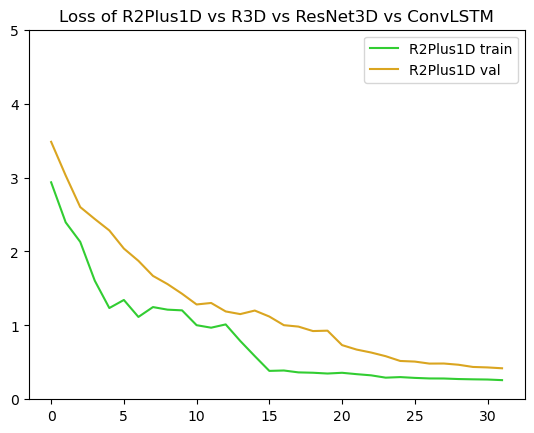

In [92]:
# Define color codes
color1 = '#4169E1'   # Royal Blue
color2 = '#DC143C'   # Crimson
color3 = '#32CD32'   # Lime Green
color4 = '#DAA520'   # Goldenrod
color5 = '#FF1493'   # Deep Pink
color6 = '#FF8C00'   # Dark Orange
color7 = '#1E90FF'   # Dodger Blue
color8 = '#9932CC'   # Dark Orchid


n = "Loss of R2Plus1D vs R3D vs ResNet3D vs ConvLSTM"
#plot_metric(train_metric=train_loss_history_r3d, eval_metric=val_loss_history_r3d, train_metric_name="R3D train", eval_metric_name="R3D val", plot_name=n, c1=color1, c2=color2)
plot_metric(train_metric=train_loss_history_r2plus1d, eval_metric=val_loss_history_r2plus1d, train_metric_name="R2Plus1D train", eval_metric_name="R2Plus1D val", plot_name=n, c1=color3, c2=color4)
#plot_metric(train_metric=train_loss_history_resnet3d, eval_metric=val_loss_history_resnet3d, train_metric_name="ResNet3D train", eval_metric_name="ResNet3D val", plot_name=n, c1=color5, c2=color6)
#plot_metric(train_metric=train_loss_history_convlstm, eval_metric=val_loss_history_convlstm, train_metric_name="ConvLSTM train", eval_metric_name="ConvLSTM val", plot_name=n ,c1=color7, c2=color8)



### Plot Accuracy

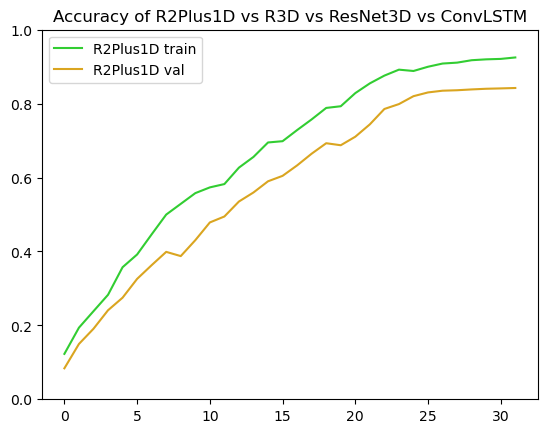

In [93]:
n = "Accuracy of R2Plus1D vs R3D vs ResNet3D vs ConvLSTM"
#plot_metric(train_metric=train_accuracy_history_r3d, eval_metric=val_accuracy_history_r3d, train_metric_name="R3D train", eval_metric_name="R3D val", plot_name=n, c1=color1, c2=color2, top_lim=1)
plot_metric(train_metric=train_accuracy_history_r2plus1d, eval_metric=val_accuracy_history_r2plus1d, train_metric_name="R2Plus1D train", eval_metric_name="R2Plus1D val", plot_name=n, c1=color3, c2=color4, top_lim=1)
#plot_metric(train_metric=train_accuracy_history_resnet3d, eval_metric=val_accuracy_history_resnet3d, train_metric_name="ResNet3D train", eval_metric_name="ResNet3D val", plot_name=n, c1=color5, c2=color6, top_lim=1)
#plot_metric(train_metric=train_accuracy_history_convlstm, eval_metric=val_accuracy_history_convlstm, train_metric_name="ConvLSTM train", eval_metric_name="ConvLSTM val", plot_name=n ,c1=color7, c2=color8, top_lim=1)


# <a name="test"></a> **<font style="color:rgb(134,19,348)"> Test the model </font>**
This code defines a function named `predict()` that is responsible for making predictions on test data using the trained deep learning model. 

Before making predictions, the function sets the model to evaluation mode by calling `model.eval()`. This is important because it disables the dropout layers and other features that are only active during training and can interfere with the model's predictions.

The function then initializes some variables that will be used to keep track of the model's performance on the test data. These include `test_labels`, which will store the ground truth labels for the test data, `test_preds`, which will store the predicted labels, and `test_correct` and `test_total`, which will be used to calculate the model's accuracy.

The function then enters a loop that iterates over the test data in batches. At each iteration, the batch of test data is loaded onto the device specified by `device` using `frame_seq.to(device=device).float()` and `labels.to(device=device)`. The model is then called with the input data to obtain the predicted outputs using `outputs = model(frame_seq).to(device=device).float()`.

The function updates the `test_labels` and `test_preds` variables with the ground truth and predicted labels for the current batch, respectively. It also calculates the number of correctly predicted samples in the current batch using `(outputs.argmax(dim=1) == labels).sum().item()`, which computes the number of times the model's predicted label matches the ground truth label. The `test_correct` variable is updated with this number.

The function also keeps track of the total number of samples in the current batch by adding `labels.size(0)` to `test_total`. At the end of each batch iteration, the function prints the number of correctly predicted samples and the total number of samples seen so far.

After the loop is finished, the function calculates the overall accuracy of the model on the test data by dividing `test_correct` by `test_total` and multiplying by 100 to obtain a percentage. The function returns the `test_labels`, `test_preds`, and overall accuracy as a tuple.

Finally, the `predict()` function is called, and its outputs are assigned to the variables `test_labels`, `test_preds`, and `test_correct`.

In [ ]:

def predict():
    # Testing mode
    model.eval()
    # test_loss = 0.0
    
    test_labels = []
    test_preds  = []
    test_correct = 0
    test_total  = 0
    
    with torch.no_grad():
        for i, (frame_seq, labels) in enumerate(tqdm( test_loader )):

            # Get data to device. Not inplace operation 
            frame_seq = frame_seq.to(device=device).float()
            labels    = labels.to(device=device)#.float()
            outputs   = model(frame_seq).to(device=device).float()
            
            test_labels.extend(labels.cpu())
            test_preds.extend(outputs.argmax(dim=1).cpu())
            # if i % 20 == 0:
            #    print(f"iter: {i+1}\n\tlabels: {labels}\n\t outputs.argmax(dim=1): {outputs.argmax(dim=1)}" )
            #    print(f"labels==outputs.argmax(dim=1): {((outputs.argmax(dim=1) == labels).sum().item())/labels.size(0)}" )
            
            test_correct += (outputs.argmax(dim=1) == labels).sum().item()
            test_total += labels.size(0)
            
            if i % 100 == 0:
                print(f"test_correct: {test_correct} \t test_total: {test_total}\n")
                print(f"Total accuracy till iteration {i}: {(test_correct/test_total)*100}%\n\n")

    print(f"Total accuracy: {(test_correct/test_total)*100}%\n\n")
    
    return test_labels, test_preds, test_correct/test_total


test_labels, test_preds, test_correct = predict()


# <a name="confusionmatrix"></a> **<font style="color:rgb(134,19,348)">Confusion matrix </font>**


In [ ]:
def confusion_matrix_score(ytest, ypred, class_labels=class_labels):
    print(f"\nAccuracy score: {accuracy_score(ytest, ypred)}", end="\n\n")
    print(f"Classification report:\n{classification_report(ytest, ypred, target_names=class_labels, zero_division=1.0)}", end="\n\n")

    # Compute confusion matrix
    cm = confusion_matrix(ytest, ypred)

    #Confusion Matrix
    plt.figure(figsize=(15,15))
    plt.title("Confusion matrix", fontsize=20)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted label', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.set_xticks(ypred)
    ax.set_xticklables(class_labels )
    #ax.xaxis.set_ticklabels(class_labels, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True label', fontsize=20)
    ax.set_yticks(ytest)
    ax.set_yticklables(class_labels )
    #ax.yaxis.set_ticklabels(class_labels, fontsize = 10)
    plt.yticks(rotation=0)

    #plt.savefig('ConMat24.png')
    plt.show()


In [ ]:
confusion_matrix_score(ytest=test_labels, ypred=test_preds)

---
---

In [ ]:
# To delete a Dir and its files and inner dirs recursively
#import shutil
#shutil.rmtree("/kaggle/working/test_videos")

### <a name="dwonloadyt"></a> **<font style="color:rgb(134,19,348)">Download YouTube Videos:</font>**


In [ ]:
#!wget --no-check-certificate -O oiutput.mp4 yt_vid_link

"""
yt.streams
... .filter(progressive=True, file_extension='mp4')
... .order_by('resolution')
... .desc()
... .first()
... .download()
"""

def Download(link, working_dir):
    
    #!pip install pytube
    from pytube import YouTube
        
    yt = YouTube(link)
    try:
        filename = yt.title + '.mp4'
        filename = filename.replace(" ", "_")
    except:
        filename = 'test_video' + '.mp4'
    yt = yt.streams.get_highest_resolution()
    yt.download(output_path=working_dir, filename=filename, skip_existing=True)
    
    return filename


### <a name="inference"></a> **<font style="color:rgb(134,19,348)">Inference on Videos</font>**


In [ ]:
# Link to deque doc `https://docs.python.org/3/library/collections.html#collections.deque:~:text=class%20collections.deque(%5Biterable%5B%2C%20maxlen%5D%5D)`
from collections import deque

def predict_on_video(SEQUENCE_LENGTH, video_file_path, output_file_path, transform=None):
    '''
    This function will perform action recognition on a video.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    width  = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    # Initialize the VideoWriter Object to store the output video in the disk.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_file_path, fourcc, fps, (width, height))

    # Declare a “double-ended queue” to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Evaluation mode
    model.eval()
    
    try:
        while video_reader.isOpened():

            # Read the frame.
            ok, frame = video_reader.read() 

            # Check if frame is not read properly then break the loop.
            if not ok:
                break

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Apply data augmentation here: transform...
            if transform is not None:
                modify_frame = transform(frame)
            else:
                # The transform specific to pretrained models like R3D
                transform = transforms.Compose([
                    transforms.ToPILImage(), 
                    transforms.Resize(size=(IMAGE_WIDTH, IMAGE_HEIGHT)),
                    #Convert a PIL Image to a tensor of the same type - this does not scale values.
                    transforms.PILToTensor()
                ])
                
                modify_frame = transform(frame)

            # Appending the pre-processed frame into the frames list.
            frames_queue.append(modify_frame)

            # Check if the number of frames in the queue are equal to the fixed sequence length.
            if len(frames_queue) == SEQUENCE_LENGTH:

                # Add the batch dim.
                l = torch.stack(list(frames_queue), dim=0)
                frames = torch.unsqueeze(input=l, dim=0).to(device=device)
                
                with torch.no_grad():
                    # get the predicted probabilities.
                    predicted_labels_probabilities = torch.sigmoid( model(frames) )[0] #shape[num_classes]

                # Get the index of class with highest probability.
                predicted_label = torch.argmax(predicted_labels_probabilities, dim=0)

                # Get the class name using the retrieved index.
                predicted_class_name = class_labels[predicted_label]

            # Write predicted class name on top of the frame.
            b,g,r = 0,255,0
            cv2.putText(img=frame, 
                        text=predicted_class_name, 
                        org=(10, 30), 
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=1, 
                        color=(b,g,r),
                        thickness=2
                       )

            # Write The frame into the disk using the VideoWriter Object.
            video_writer.write(frame)

    finally:
        # Release the VideoCapture and VideoWriter objects.
        video_reader.release()
        video_writer.release()

## Write predictions on video frames and save the video 

In [ ]:
# Download the youtube video.
link = 'https://www.youtube.com/watch?v=8u0qjmHIOcE'
working_dir = "/kaggle/working/test_videos"
filename = Download(link, working_dir)
full_filename = os.path.join(working_dir, filename)
print(f"full_filename: {full_filename}")

saved_path = os.path.join(working_dir, "modify_"+filename)
print(f"saved_path: {saved_path}")

predict_on_video(SEQUENCE_LENGTH, video_file_path=full_filename, output_file_path=saved_path,transform=test_transform)

# <a name="visualize"></a> **<font style="color:rgb(134,19,348)">Visualize the modified video </font>**

In [ ]:
from IPython.display import Video
Video(data='/kaggle/working/test_videos/1_modify_test_video.avi', embed=True, html_attributes="controls")

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def play_stored_video(filename):
    width=700
    height=700
    ext = "mp4"
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html = f'<video width={width} height={height} controls autoplay loop ><source src={src} type="video/{ext}"></video>'
    return HTML(html)

play_stored_video(saved_path)